# FIFA 21 Players Dataset Cleaning & Transformation

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/fifa21 raw data v2.csv')

C:\Users\Tom\AppData\Local\Temp\ipykernel_26920\2242092455.py:6: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/fifa21 raw data v2.csv')


In [66]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [67]:
df.shape

(18979, 77)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [69]:
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,68.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [70]:
df.duplicated().sum()

0

In [71]:
df.isna().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

## Tasks - Data Cleaning & Transformation

1. Remove useless columns.
2. Convert height and weight columns to appropriate data types.
3. Separate the joined columns into year, month, and day columns.
4. Clean and transform the value, wage, and release clause columns into columns of integers. 
5. Remove the unnecessary newline characters.
6. Separate the Team and Contract columns.

1. Drop useless columns.

In [72]:
df = df.drop(["LongName","photoUrl","playerUrl"],axis=1)
df= df.rename(columns={"↓OVA":"OVA"})

2. Convert height and weight columns to appropriate data types

In [73]:
# Convert height
df["Height"]=df["Height"].str.strip("cm")

df["Height"] = df["Height"].str.replace("'", '').str.replace('"', '')
df["Height"] = pd.to_numeric(df["Height"])

In [74]:
df["Height"].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166,  62, 164, 198,
        63,  65, 511,  64,  61,  60, 510,  59,  56,  57,  54, 201, 158,
       162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [75]:
# Convert weight 
df["Weight"]=df["Weight"].str.strip("kg")
df["Weight"].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [76]:
# Function to convert lbs to kgs 
def lbs_to_kg(x):
    if "lbs" in x: 
        lbs = x.replace("lbs","")
        kilograms = round(int(lbs)/2.2, 0)
        return int(kilograms)
    else:
        return int(x)

In [77]:
df["Weight"] = df["Weight"].apply(lbs_to_kg)
df["Weight"].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

3. Separate the joined columns into year, month, and day columns


In [78]:
from datetime import datetime

df['Joined'] = pd.to_datetime(df['Joined'], format='%b %d, %Y')

In [79]:
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: Joined, Length: 18979, dtype: datetime64[ns]

4. Clean and transform the value, wage, and release clause columns into columns of integers. 

In [80]:
def money(x):
    if "€" in x:
        x=x.replace("€","")
    if "M" in x:
        x=x.replace("M","")
        x=float(x)*1000000
        return int(x)
    
    elif "K" in x:
        x = x.replace("K","")
        x = float(x)*1000
        return int(x)
    else:
        return int(x)
    
df["Value"]=df["Value"].apply(money)
df["Wage"]=df["Wage"].apply(money)
df["Release Clause"]=df["Release Clause"].apply(money)

5. Remove the unnecessary newline characters.

In [81]:
df["Club"]=df["Club"].str.strip("\n")
df["Hits"]=df["Hits"].str.strip("\n")

6. Separate the Team and Contract columns.

In [82]:
def type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.NA
    
def start_time_contract(x):
    if "~" in x:
        return int(x[:4])
    if "Loan" in x:
        x=x.strip("On Loan")
        x=datetime.strptime(x,"%b %d, %Y")
        return x.date()
    else:
        return pd.NA
    
def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()
    else:
        return pd.NA
    
df["Contract Type"] = df["Contract"].apply(type)
df["Start Year"] = df["Contract"].apply(start_time_contract)
df["End Year"] = df.apply(lambda row: end_time_contract(row["Contract Type"],row["Contract"], row["Loan Date End"]), axis = 1)

In [83]:
df=df[list(df.columns[:7])+list(df.columns[-3:])+list(df.columns[8:-3])]
df=df.drop(columns=["Loan Date End"])

7. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical.

In [84]:
df["W/F"]=df["W/F"].str.replace("★","")
df["SM"]=df["SM"].str.replace("★","")
df["IR"]=df["IR"].str.replace("★","")


8. Because the metrics within FIFA have a range of 0 to 99, an average of the Sum would represent the stats better. 

In [85]:
df["Attacking"]=round(df["Attacking"]/5,0)
df["Attacking"]=df["Attacking"].astype("int64")

df["Skill"]=df["Skill"]/5
df["Skill"]=df["Skill"].astype("int64")


df["Movement"]=df["Movement"]/5
df["Movement"]=df["Movement"].astype("int64")


df["Power"]=df["Power"]/5
df["Power"]=df["Power"].astype("int64")


df["Mentality"]=df["Mentality"]/6
df["Mentality"]=df["Mentality"].astype("int64")

df["Defending"]=df["Defending"]/3
df["Defending"]=df["Defending"].astype("int64")

df["Goalkeeping"] = df["Goalkeeping"]/5
df["Goalkeeping"] = df["Goalkeeping"].astype("int64")

### Clean Dataset

In [86]:
df.to_csv('data/clean_fifa21_data.csv',index=False)

## Analysis/Visualizing Relationships

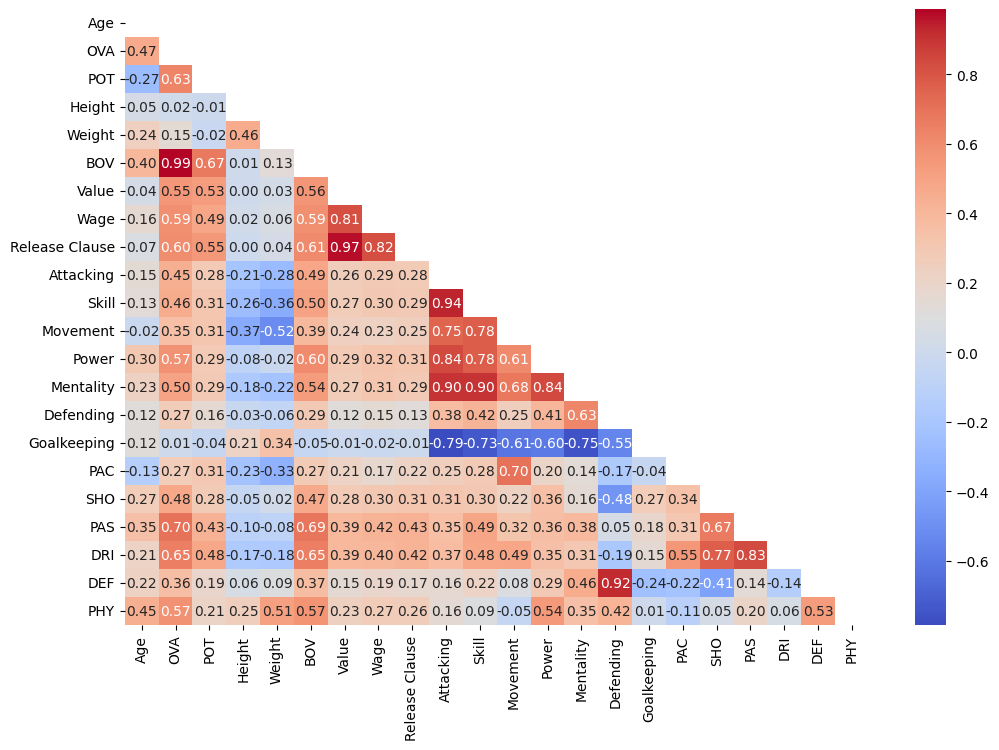

In [87]:
df_skills = df[['Age','OVA','POT','Height','Weight','BOV','Value','Wage','Release Clause','Attacking','Skill', 'Movement','Power','Mentality','Defending','Goalkeeping','PAC','SHO','PAS','DRI','DEF','PHY']]

corr_matrix = df_skills.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.show()

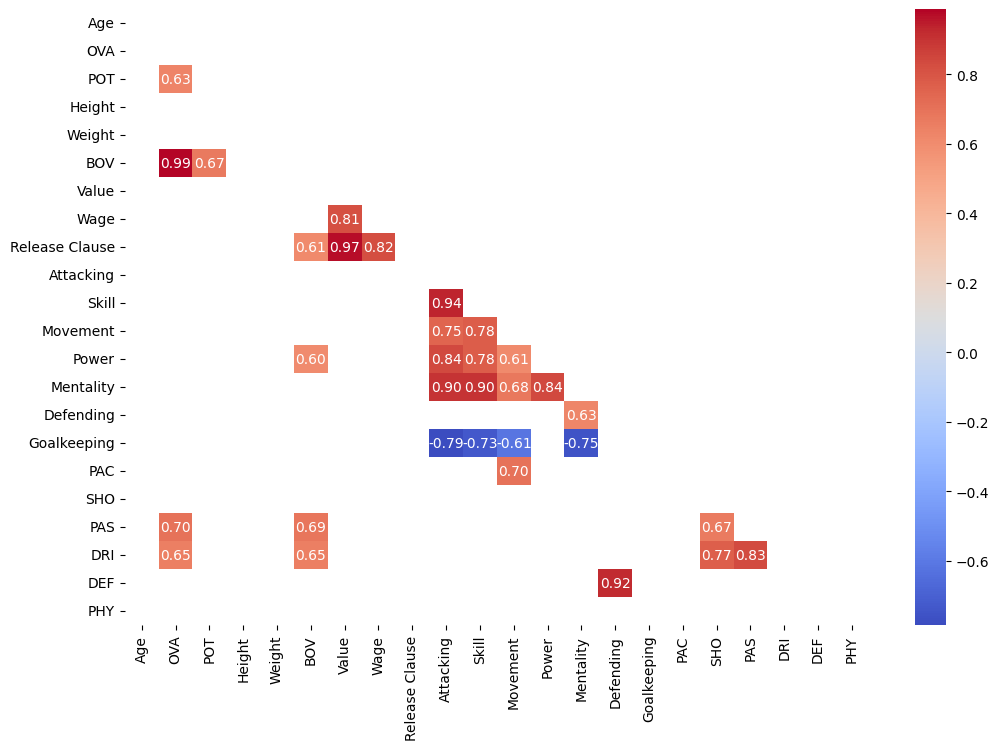

In [88]:
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]

mask = np.triu(np.ones_like(high_corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.show()


#### Overall Rating Distribtion

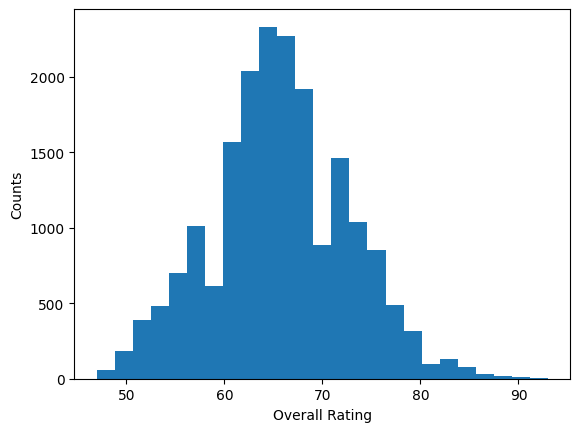

In [89]:
plt.hist(df["OVA"], bins = 25)
plt.ylabel("Counts")
plt.xlabel("Overall Rating")
plt.show()

#### Countries with Most Players

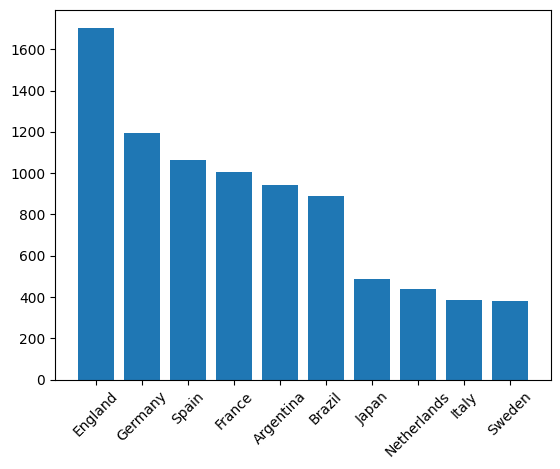

In [90]:
s=df.groupby("Nationality").size().reset_index(name="Count").sort_values(by="Count", ascending=False)
s=s[0:10]
plt.bar(s["Nationality"], s["Count"])
plt.xticks(rotation=45)
plt.show()

#### Countries with Top 100 Players 

#### Which players are highly valuable but still underpaid (on low wages)? 

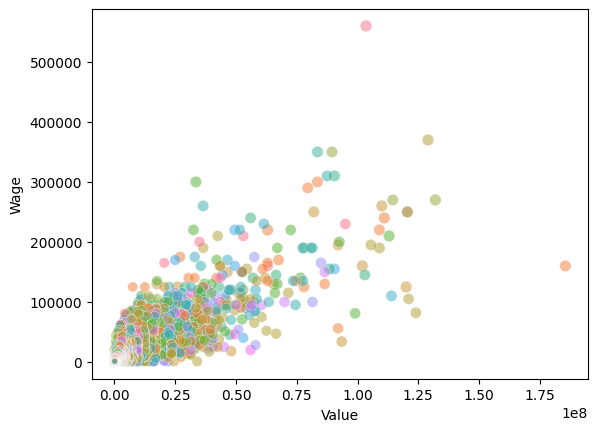

In [91]:
sns.scatterplot(data=df, y="Wage", x="Value", hue="Best Position", size="OVA", alpha=0.5,legend=False)

plt.show()